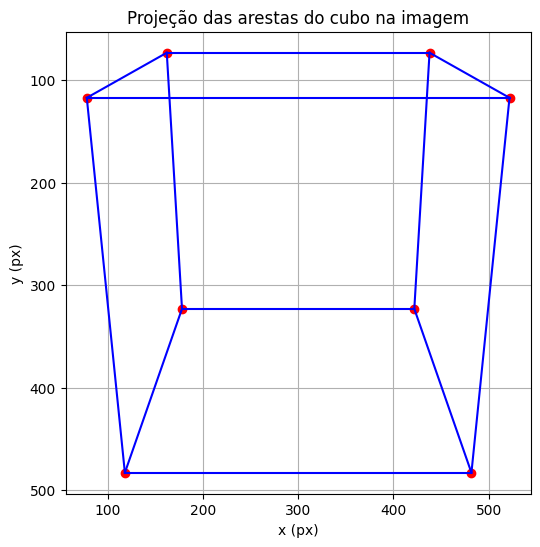

In [3]:
## Questão 1

# Pontos 2D detectados pela câmera (px)
img_pts = np.array([
    [422, 323],
    [178, 323],
    [118, 483],
    [482, 483],
    [438, 73],
    [162, 73],
    [78, 117],
    [522, 117]
])

# Conectividade das arestas do cubo
edges = [
    (0,1), (1,2), (2,3), (3,0),   # quadrado de cima
    (4,5), (5,6), (6,7), (7,4),   # quadrado de baixo
    (0,4), (1,5), (2,6), (3,7)    # colunas
]

plt.figure(figsize=(6,6))
plt.scatter(img_pts[:,0], img_pts[:,1], color='red')

# Desenhar as arestas
for a, b in edges:
    x = [img_pts[a,0], img_pts[b,0]]
    y = [img_pts[a,1], img_pts[b,1]]
    plt.plot(x, y, 'b-')
plt.gca().invert_yaxis()  # Imagens têm origem no canto superior esquerdo
plt.title("Projeção das arestas do cubo na imagem")
plt.xlabel("x (px)")
plt.ylabel("y (px)")
plt.grid(True)
plt.show()

In [6]:
## Questão 2

# Posição de Cada Camera
Camera = np.array([
    [ 2,  2,  2],
    [-2,  2,  2],
    [-2,  2, -2],
    [ 2,  2, -2],
    [ 2, -2,  2],
    [-2, -2,  2],
    [-2, -2, -2],
    [ 2, -2, -2]
])
# Adiciona coordenada homogênea
Camera_h = np.hstack([Camera, np.ones((8,1))])

A = []

for i in range(8):
    X_i = Camera_h[i]
    u, v = img_pts[i]

    A.append([0,0,0,0, -X_i[0],-X_i[1],-X_i[2],-X_i[3], v*X_i[0], v*X_i[1], v*X_i[2], v*X_i[3]])
    A.append([X_i[0],X_i[1],X_i[2],X_i[3], 0,0,0,0, -u*X_i[0], -u*X_i[1], -u*X_i[2], -u*X_i[3]])

A = np.array(A)

# Resolve P pelo vetor singular correspondente ao menor valor singular
U, S, Vt = np.linalg.svd(A)
P = Vt[-1].reshape(3,4)

# Normaliza para facilitar leitura
Pnorm = P / P[-1,-1]

print("Matriz de projeção P:")
print(Pnorm)

Matriz de projeção P:
[[7.86091518e+01 1.15453897e+01 3.21015663e+01 3.00000238e+02]
 [9.89804924e-05 8.34795321e+01 2.82547624e-02 2.49938824e+02]
 [3.97512004e-07 3.84846474e-02 1.07005259e-01 1.00000000e+00]]


In [10]:
## Questão 3

b = Pnorm[:, -1]
B = Pnorm[:,:-1]

R, Q = linalg.rq(B)
K = R / R[2, 2]
R_sol = Q
print(K)
print(R_sol)


C = (-np.linalg.inv(B)) @ b
C = np.append(C, 1)
print(C)


[[-6.91278652e+02 -2.33562070e-06  3.00002308e+02]
 [-0.00000000e+00  6.90706665e+02  2.48678031e+02]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00 -1.18457260e-06 -3.28884905e-06]
 [-1.62952995e-09 -9.40991752e-01  3.38429494e-01]
 [-3.49567414e-06 -3.38429494e-01 -9.40991752e-01]]
[-4.41164063e-06 -2.99121430e+00 -8.26953908e+00  1.00000000e+00]
